# Ford gobike Data Analysis
## by Babatunde Olaniyi

## Introduction
> 	
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the United States of America.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Loading data set


In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

### Visual and programmatic assesment of data

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
98889,743,2019-02-15 04:20:25.2710,2019-02-15 04:32:48.4320,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,4775,Subscriber,1983.0,Male,No
61865,641,2019-02-20 17:20:04.2180,2019-02-20 17:30:45.2660,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,22.0,Howard St at Beale St,37.789756,-122.394643,5246,Subscriber,1984.0,Male,No
7079,333,2019-02-28 09:25:41.7770,2019-02-28 09:31:15.3760,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,4959,Subscriber,1992.0,Female,No
146774,489,2019-02-07 08:28:47.3470,2019-02-07 08:36:56.3840,176.0,MacArthur BART Station,37.828410,-122.266315,181.0,Grand Ave at Webster St,37.811377,-122.265192,4628,Subscriber,1981.0,Male,No
63627,590,2019-02-20 14:21:47.9770,2019-02-20 14:31:38.8800,201.0,10th St at Fallon St,37.797673,-122.262997,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3112,Customer,NaN,NaN,No
19726,830,2019-02-26 15:59:19.1950,2019-02-26 16:13:09.9110,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,4899,Subscriber,1997.0,Male,No
136273,2016,2019-02-08 09:45:30.0970,2019-02-08 10:19:06.2990,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,4807,Subscriber,NaN,NaN,No
173038,792,2019-02-03 13:37:13.0030,2019-02-03 13:50:25.1980,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,97.0,14th St at Mission St,37.768265,-122.420110,5120,Customer,1988.0,Female,No
61805,182,2019-02-20 17:30:21.6370,2019-02-20 17:33:23.8770,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,5512,Subscriber,1989.0,Male,No
54136,319,2019-02-21 13:43:32.5710,2019-02-21 13:48:52.1680,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5518,Subscriber,1988.0,Male,No


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
df.shape

(183412, 16)

In [9]:
# Dropping null values

df.dropna(inplace = True)

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [12]:
# Changing data types
df["start_time"] = df["start_time"].astype('datetime64')
df["end_time"] = df["end_time"].astype('datetime64')


In [13]:
df["bike_id"] = df["bike_id"].astype(str)

In [14]:
# Splitting the time stamp in the start_time coluimn into four components: 'year','month', 'day' and 'hour'

df['start_month'] = df.start_time.dt.month
df['start_day'] = df.start_time.dt.dayofweek
df['start_hour'] = df.start_time.dt.hour

In [15]:
# Splitting the time stamp in the end_time coluimn into four components: 'year','month', 'day' and 'hour'

df['end_month'] = df.end_time.dt.month
df['end_day'] = df.end_time.dt.dayofweek
df['end_hour'] = df.end_time.dt.hour

In [16]:
# Creating a new column for distance traveled between start and end stations using the longitudes and latitudes.

import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [17]:
# Creating a new column for distance traveled
df['distance_km'] = df.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [18]:
# Creating a column for member age

df['member_age'] = 2019-df['member_birth_year'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [20]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,distance_km,member_age
21492,603,2019-02-26 09:08:29.518,2019-02-26 09:18:33.252,60.0,8th St at Ringold St,37.774520,-122.409449,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,...,Male,No,2,1,9,2,1,9,1.462420,27
7689,481,2019-02-28 08:53:02.321,2019-02-28 09:01:03.455,321.0,5th St at Folsom,37.780146,-122.403071,50.0,2nd St at Townsend St,37.780526,...,Female,No,2,3,8,2,3,9,1.421569,25
162220,80,2019-02-05 12:28:21.080,2019-02-05 12:29:41.289,104.0,4th St at 16th St,37.767045,-122.390833,93.0,4th St at Mission Bay Blvd S,37.770407,...,Male,No,2,1,12,2,1,12,0.204380,20
45267,818,2019-02-22 12:32:41.880,2019-02-22 12:46:20.078,206.0,College Ave at Bryant Ave,37.838127,-122.251271,193.0,Grand Ave at Santa Clara Ave,37.812744,...,Female,No,2,4,12,2,4,12,1.572149,53
159889,733,2019-02-05 17:30:16.659,2019-02-05 17:42:30.367,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Female,No,2,1,17,2,1,17,1.126018,26
38898,584,2019-02-23 10:52:19.420,2019-02-23 11:02:04.285,58.0,Market St at 10th St,37.776619,-122.417385,120.0,Mission Dolores Park,37.761420,...,Female,No,2,5,10,2,5,11,1.354155,21
74048,398,2019-02-19 11:47:00.740,2019-02-19 11:53:38.935,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,27.0,Beale St at Harrison St,37.788059,...,Male,No,2,1,11,2,1,11,1.731478,36
98635,620,2019-02-15 07:19:04.813,2019-02-15 07:29:24.852,22.0,Howard St at Beale St,37.789756,-122.394643,104.0,4th St at 16th St,37.767045,...,Male,No,2,4,7,2,4,7,1.417668,40
85030,427,2019-02-17 16:11:51.661,2019-02-17 16:18:58.806,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,368.0,Myrtle St at Polk St,37.785434,...,Male,No,2,6,16,2,6,16,2.106513,33
165392,967,2019-02-05 07:04:33.579,2019-02-05 07:20:41.185,70.0,Central Ave at Fell St,37.773311,-122.444293,16.0,Steuart St at Market St,37.794130,...,Male,No,2,1,7,2,1,7,5.681675,27


In [21]:
# Checking for the unique values in the start_day column

df['start_day'].unique()

array([3, 2, 1, 0, 6, 5, 4], dtype=int64)

In [22]:
# Replacing the int values in the start_day column with actual names of days of the week

df.loc[df["start_day"] == 0, "start_day"] = "Mon"
df.loc[df["start_day"] == 1, "start_day"] = "Tue"
df.loc[df["start_day"] == 2, "start_day"] = "Wed"
df.loc[df["start_day"] == 3, "start_day"] = "Thu"
df.loc[df["start_day"] == 4, "start_day"] = "Fri"
df.loc[df["start_day"] == 5, "start_day"] = "Sat"
df.loc[df["start_day"] == 6, "start_day"] = "Sun"

df.loc[df["end_day"] == 0, "end_day"] = "Mon"
df.loc[df["end_day"] == 1, "end_day"] = "Tue"
df.loc[df["end_day"] == 2, "end_day"] = "Wed"
df.loc[df["end_day"] == 3, "end_day"] = "Thu"
df.loc[df["end_day"] == 4, "end_day"] = "Fri"
df.loc[df["end_day"] == 5, "end_day"] = "Sat"
df.loc[df["end_day"] == 6, "end_day"] = "Sun"




In [23]:
df.start_day.unique()

array(['Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri'], dtype=object)

In [24]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,end_month,end_day,end_hour,distance_km,member_age
144094,752,2019-02-07 13:09:05.201,2019-02-07 13:21:37.795,74.0,Laguna St at Hayes St,37.776435,-122.426244,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Male,No,2,Thu,13,2,Thu,13,2.935273,31
91259,323,2019-02-16 09:43:00.251,2019-02-16 09:48:24.061,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4.0,Cyril Magnin St at Ellis St,37.785881,...,Male,No,2,Sat,9,2,Sat,9,0.129129,31
167363,484,2019-02-04 17:20:56.578,2019-02-04 17:29:01.294,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Male,No,2,Mon,17,2,Mon,17,0.692276,42
81486,205,2019-02-18 13:09:09.404,2019-02-18 13:12:35.344,9.0,Broadway at Battery St,37.798572,-122.400869,11.0,Davis St at Jackson St,37.797280,...,Female,No,2,Mon,13,2,Mon,13,0.281276,30
51023,509,2019-02-21 18:25:13.436,2019-02-21 18:33:43.254,16.0,Steuart St at Market St,37.794130,-122.394430,321.0,5th St at Folsom,37.780146,...,Male,No,2,Thu,18,2,Thu,18,1.271751,39
133533,753,2019-02-08 18:45:46.527,2019-02-08 18:58:20.045,49.0,S Park St at 3rd St,37.780760,-122.394989,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,...,Female,No,2,Fri,18,2,Fri,18,2.587294,33
138014,268,2019-02-08 08:12:02.203,2019-02-08 08:16:31.088,176.0,MacArthur BART Station,37.828410,-122.266315,212.0,Mosswood Park,37.824893,...,Male,No,2,Fri,8,2,Fri,8,0.686149,50
154379,515,2019-02-06 09:52:17.891,2019-02-06 10:00:53.697,304.0,Jackson St at 5th St,37.348759,-121.894798,327.0,5th St at San Salvador St,37.332039,...,Female,Yes,2,Wed,9,2,Wed,10,1.750517,27
126241,269,2019-02-10 20:02:38.341,2019-02-10 20:07:07.515,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,...,Male,Yes,2,Sun,20,2,Sun,20,1.076803,20
51460,331,2019-02-21 18:03:53.740,2019-02-21 18:09:25.429,258.0,University Ave at Oxford St,37.872355,-122.266447,242.0,Milvia St at Derby St,37.860125,...,Male,No,2,Thu,18,2,Thu,18,0.796180,30


### What is the structure of your dataset?

> There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.



### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in investigating bike trip start time and duration as a dependent variable and its relationship with other variables in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start_time column has a time stamp which will largely help me in investigating the most likely time for bike trips to start in terms of hour and week day. I also expect that trip duration is highly dependent on the start stations and end stations, some stations should be recording more duration sec based on the population of people in the area. I also think user_type, birthyear and gender should also affect trip duration

## Univariate Exploration




#### Question 1: What hour of the day is a bike trip most likely to start?

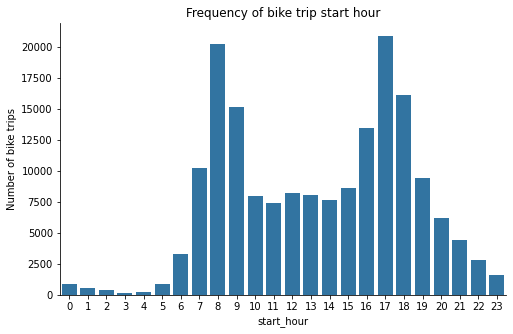

In [25]:
# bike ride start frequency per hours

def plot_frequency(hour, xlabel, ylabel, title):
    
    fig, ax = plt.subplots(figsize = [8,5])

    default_color = sb.color_palette()[0]
    sb.countplot(data = df, x = hour, color = default_color)
    plt.title(title)
    plt.ylabel(ylabel)
    sb.despine()


plot_frequency('start_hour', 'Start hour', 'Number of bike trips','Frequency of bike trip start hour')

>#### Observation: 
>Most of the bike trips start in the 8th, 9th, 17th and 18th hours. This is expected as it can be linked to morning rush and closing hour from work.
>
>It is also seen that the 3rd and 4th hours have the least trip records.

#### Question 2: What hour of the day is a bike trip most likely to end?

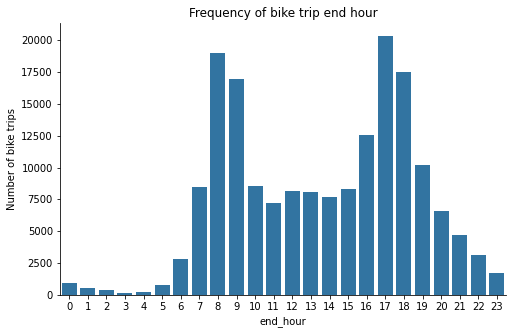

In [26]:
# bike ride end frequency per hours

plot_frequency('end_hour', 'End hour', 'Number of bike trips', 'Frequency of bike trip end hour')

>#### Observation: 
>The is an obvious similarity between the frequency of start time and end time of bike trips. Most of the bike trips end in the 8th, 9th, 17th and 18th hours and it can also be linked to morning rush and closing hour from work.
>
>It is also seen that the 3rd and 4th hours have the least trip records.

#### Question 3: What day of the week is a bike trip most likely to start?

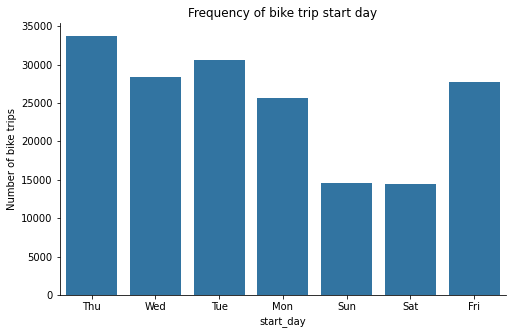

In [27]:
plot_frequency('start_day', 'Start day', 'Number of bike trips', 'Frequency of bike trip start day')

>#### Observation: 
>Thursdays record the highest number of bike trips while Saturdays and Sundays have the least of bike rides among the days. This could be linked to the fact that saturdays and sundays are rest days for most people.

#### Question 4: What is the fequency of trip end day?

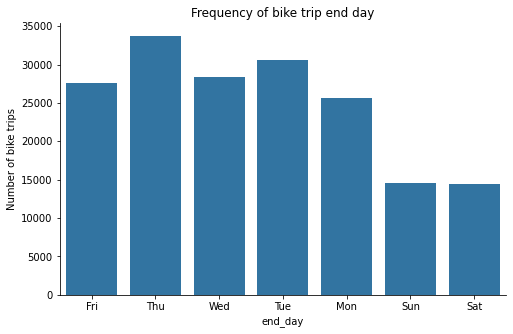

In [28]:
plot_frequency('end_day', 'End day', 'Number of bike trips', 'Frequency of bike trip end day')

>#### Observation: 
>There is also a similarity between the end_day frequency and start_day frequency.

#### Question 5: What are the top ten bikes? 

In [29]:
#Defining a function for visualization of variables with highest counts

def var_count(df, var):
    plot = df[var].value_counts().nlargest(10).plot(kind='bar')
    plt.figure(figsize=[8,5])
    
    



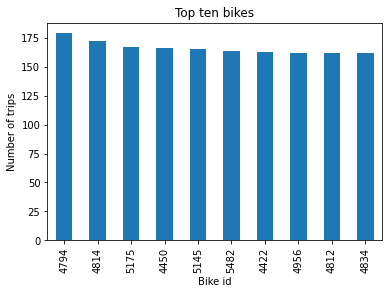

<Figure size 576x360 with 0 Axes>

In [30]:
# Bike Id disribution
plt.xlabel('Bike id')
plt.ylabel('Number of trips')
plt.title('Top ten bikes')
var_count(df, 'bike_id')

plt.show()

>#### Observation: 
>Bike with bike id 4794 is the most popular bike. This could be because of some special and distinct features that makes it more appealing to the bike users.

#### Question 6: What are the top ten start stations?

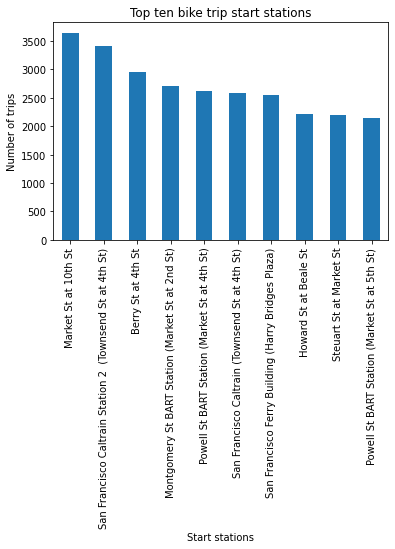

<Figure size 576x360 with 0 Axes>

In [31]:
# Bike ride start stations disribution
plt.xlabel('Start stations')
plt.ylabel('Number of trips')
plt.title('Top ten bike trip start stations')
var_count(df, 'start_station_name')

plt.show()

>#### Observation:
>The start station with most bike rides is located at **Market St at 10th St**

#### Question 7: What is the frequency of bike rides by user type?

In [32]:
# Defining a function for plotting frequency

def percentage_plot(plot_):
    ax = sb.countplot(data = df, x = plot_,  color=sb.color_palette()[6])

    total = len(df)
    for p in ax.patches:
        percentage = '{:.3f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()+.05
        ax.annotate(percentage, (x, y),ha='center')
    sb.despine()
    plt.show();



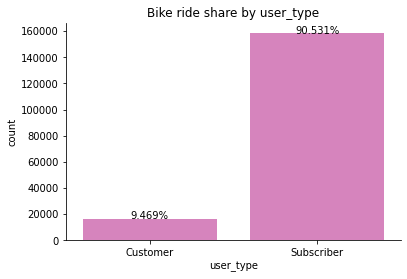

In [33]:
# Frequency of bike ride share by user type
plt.title('Bike ride share by user_type')
percentage_plot('user_type')

>#### Observation: 
>There are more subscribers than customers with subscribers at 90.5% of total bike users while customers are 9.5%.

#### Question 8: What is the frequency of bike rides by member gender?

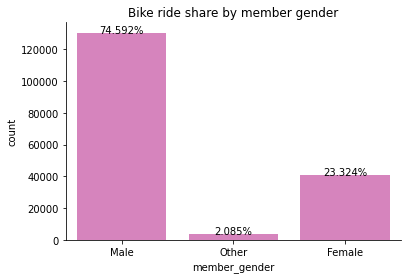

In [34]:
# Frequency of bike ride share by memeber gender
plt.title('Bike ride share by member gender')
percentage_plot('member_gender')


>#### Observation:
>There are more male(75%) than females(23%) and other gender(2%)

#### Question 9: What is the frequency of bike share for all trip?

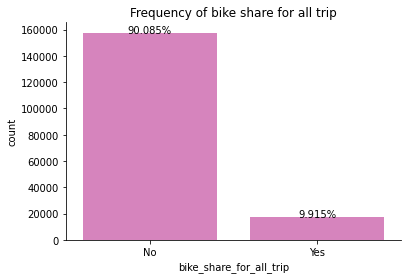

In [37]:
# Frequency of bike ride share for all trip
plt.title('Frequency of bike share for all trip')
percentage_plot('bike_share_for_all_trip')

>#### Observation:
>There are more non bike sharing for all trip (about 90%) that bike sharing for all trip

#### Question 10: What is the distribution of age of ford gobike users?

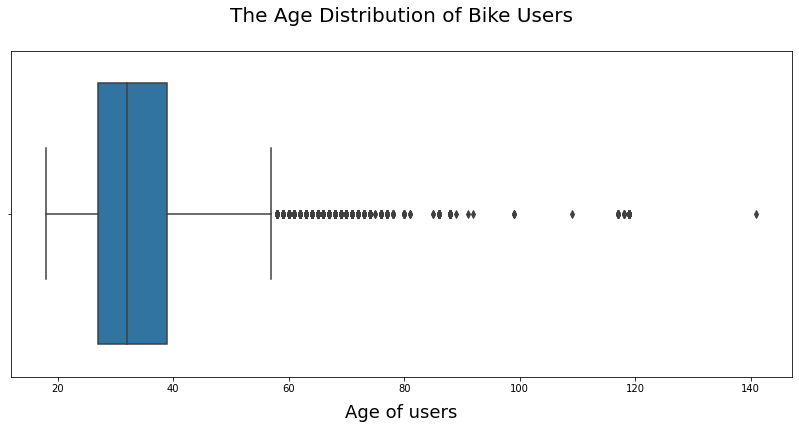

In [38]:
# distribution of bike users' age
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=df)
plt.title("The Age Distribution of Bike Users", fontsize=20, y=1.07)
plt.xlabel("Age of users", fontsize=18, labelpad=10);

>#### Observation:
>Most of the users are of the ages of between 20 and 30 years while the average age is between 30 and 40 years of age.

#### Question 11: What is the distribution of bike trip duration?

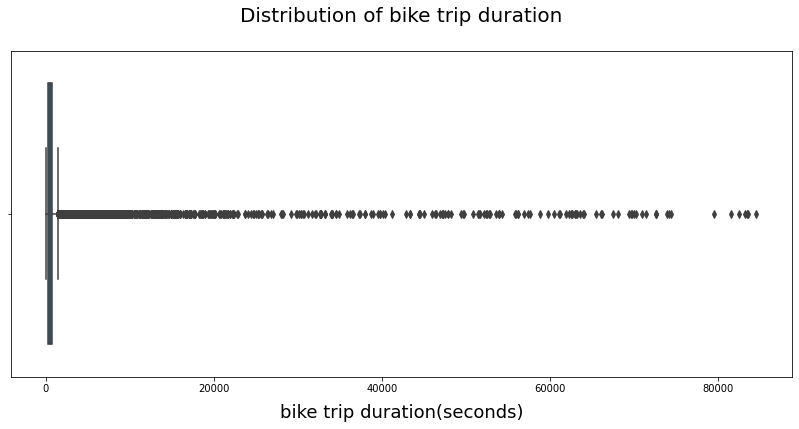

In [39]:
# distribution of bike trip duration
plt.figure(figsize=(14,6))
sb.boxplot(x='duration_sec', data=df)
plt.title("Distribution of bike trip duration", fontsize=20, y=1.07)
plt.xlabel("bike trip duration(seconds)", fontsize=18, labelpad=10);

>#### Observation:
>There is need to set limit of values on the x-axis in order to have a better view of the box.

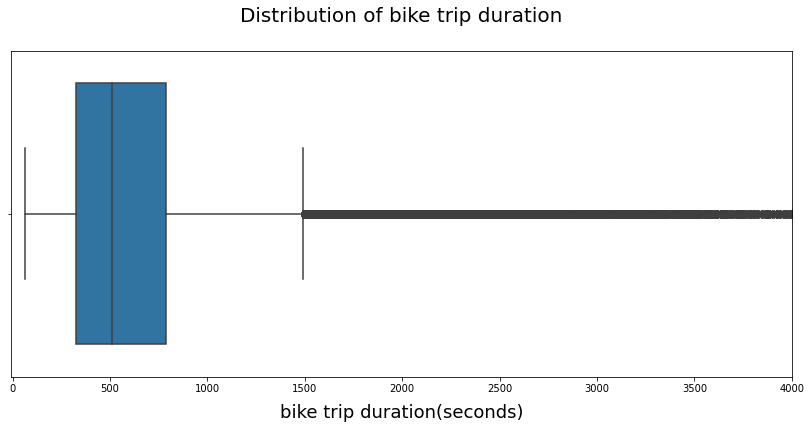

In [40]:
# Setting the limit of values on the x-axis of distribution of bike trip duration
plt.figure(figsize=(14,6))
sb.boxplot(x='duration_sec', data=df)
plt.xlim([-10, 4000])
plt.title("Distribution of bike trip duration", fontsize=20, y=1.07)
plt.xlabel("bike trip duration(seconds)", fontsize=18, labelpad=10);

>#### Observation:
>It is seen from the above boxplot that the average bike trip duration is 500 seconds.

#### Question 12: What is the distribution of distance traveled?

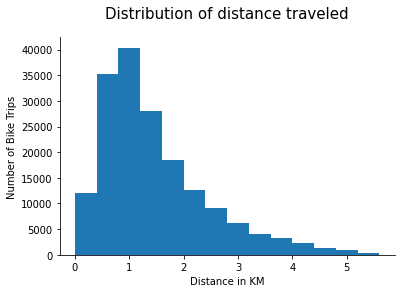

In [41]:
# Distribution of distance traveled
bins = np.arange(0, 6, 0.4)
plt.hist(data = df, x = 'distance_km', bins = bins)
plt.title("Distribution of distance traveled", y = 1.06, fontsize =15)
plt.xlabel('Distance in KM')
plt.ylabel('Number of Bike Trips');
sb.despine()

>#### Observation:
>The average speed is about 1.2 KM.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>It was interesting to visualize the hour of the day in which a bike ride is most likely to start. The ***start_time*** and ***end_time*** columns which is more like a time stamp which contains date, hour, minutes and seconds was plit to create another column for ***start-hour***, ***start_day*** and ***start-hour***, ***start_day***, respectively before creating the visualizations to show bike trip frequency by day of the week and bike trip frequency by hours of the day. 
>
>The distribution of trip duration shows that an average bike trip lasts for 500 seconds.
>
> It is also interesting to observe that bike with  bike id  4794 is the most used bike for the bike trips. This could be because it has some special features that the bike users find more appealing.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The **start_time** and **end_time** columns were converted from  from **object** to **datetime** and also feature engineered to create new columns.
>
>Birth year was converted by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better perception regarding trip duration dependency. 
>
> Also start station and end station longitudes and latitudes were used to create a new column for distance traveled in order to investigate average distance traveled by users.

## Bivariate Exploration
My exploration here will focus on the relationships between user types, member age, member gender, trip duration and distance traveled by combining the features in different pairs to discover insights.

#### Question 13: What is the relationship between member gender and user type?

Text(0.5, 1.1, 'Relationship between member gender and bike user type')

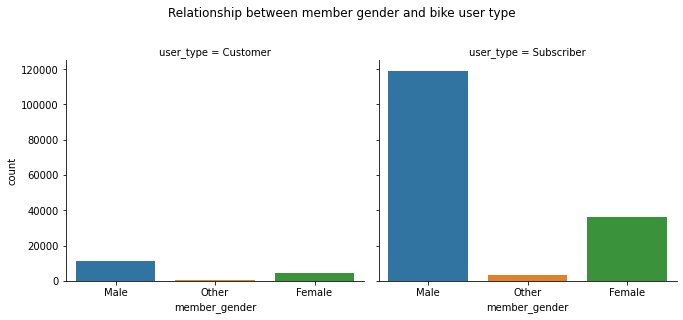

In [50]:
# Relationship between member gender and bike user type

sb.catplot(x="member_gender",col="user_type",data=df, kind="count", height=4, aspect=1.2)
plt.suptitle('Relationship between member gender and bike user type', x=0.5,y=1.1)


>### Observation:
>There are generally more males in both categories of user types.

#### Question 14: What is the relationship between Age and bike trip duration?

Text(0.5, 1.1, 'Relationship between member age and trip duration')

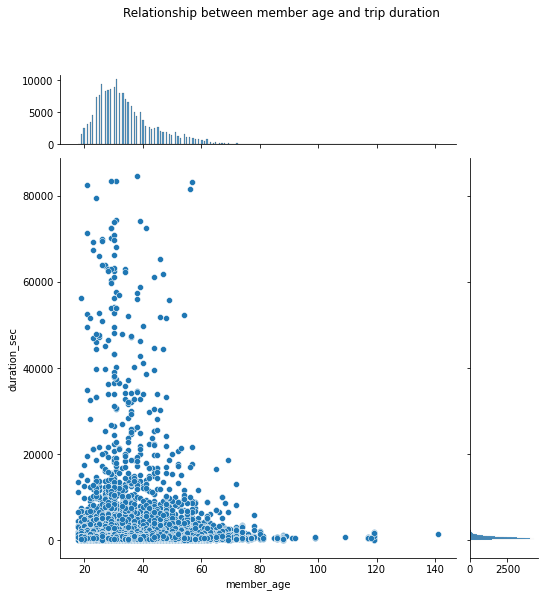

In [51]:
# Relationship between member age and trip duration
sb.jointplot(x='member_age',y='duration_sec', data=df, height=7.5, marginal_ticks=True)
plt.suptitle("Relationship between member age and trip duration", x=0.5,y=1.1)

>#### Observation:
> The visuals shows that younger people among the users are more likely to do long duration of bike trips. 

#### Question 15: What is the average distance traveled by member gender?

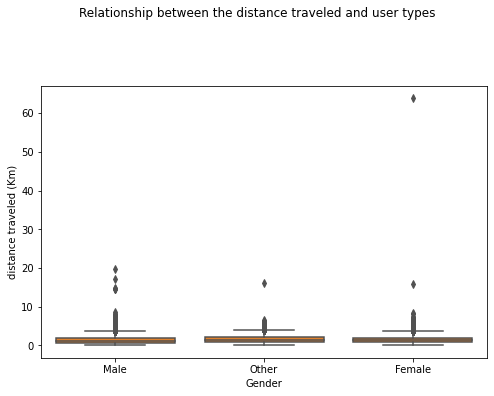

In [52]:
# Plotting a boxplot to view avarage distance traveled by member gender

plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'distance_km', color = base_color)
plt.xlabel('Gender')
plt.ylabel('distance traveled (Km)')
plt.suptitle('Relationship between the distance traveled and user types', x=0.5,y=1.1)
plt.show()

>#### Observation:
>We can have a better view of the box by setting the limit of the y-axis

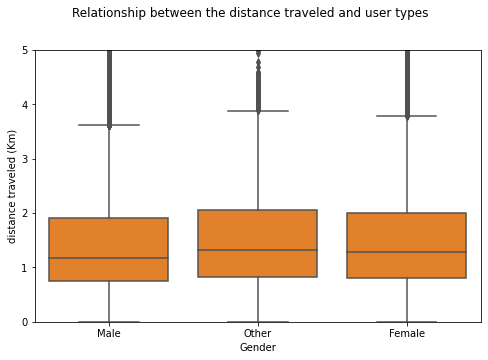

In [54]:
# setting the limit of the y-axis
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'distance_km', color = base_color)
plt.ylim([0, 5])
plt.xlabel('Gender')
plt.ylabel('distance traveled (Km)')
plt.suptitle('Relationship between the distance traveled and user types', x=0.5,y=1)
plt.show()

>#### Observation:
> The female gender has a higher average distance traveled than the male gender while the other gender has the highest average distance traveled.

#### Question 16: What is the relationship between days of tghe week and user type?

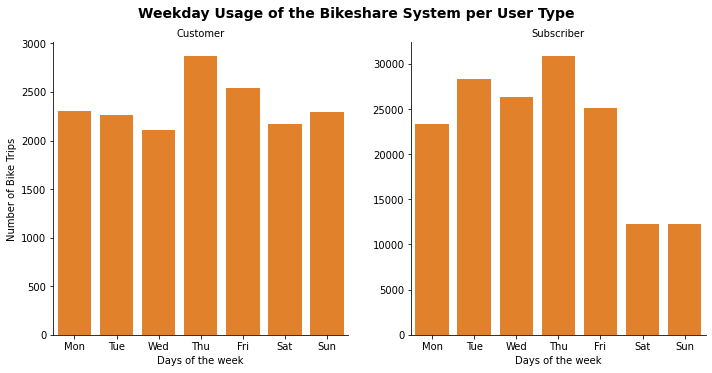

In [55]:
# Relationship between user type and days of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot = sb.catplot(data=df, x='start_day', col="user_type", kind='count', sharey = False, order = days, color = base_color)
plot.set_axis_labels("Days of the week", "Number of Bike Trips")
plot.set_titles("{col_name}")
plot.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');

>#### Observation:
> Subscribers generally have less number of bike trips than customers especially during weekends when the subscribers who probably use the bikes for going to work, are resting at home. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is very dependendable on the age of the member and I was able to show that younger users between the age of 20 to 40 years are more likely to go on long bike trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is an interesting relationship between user type and days of the week which I intend to for further explore in the multivarite analysis.
> There is also a strong relationship between distance traveled and member gender where the female gender have a higher average distance traveled than the male gender.

## Multivariate Exploration

> In this section, I am mostly interested in exploring the two categorical measures gender and user type in relation to trip duration and age.

#### Question 17: What is the relationship between gender, age and bike trip duration?

Text(0.5, 1.04, 'Relationship between member age, gender and bike trip duration')

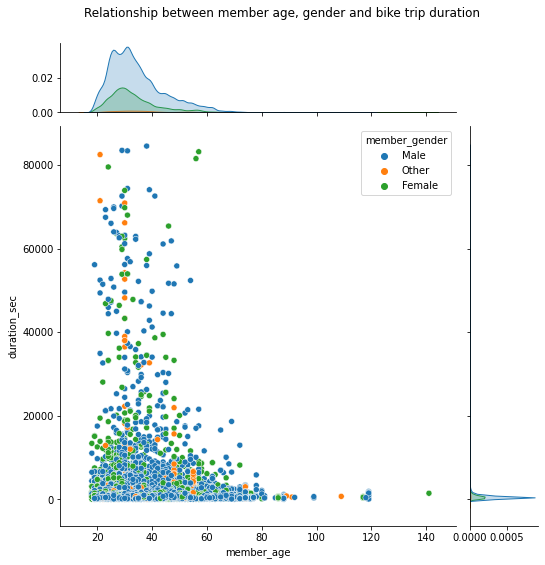

In [57]:

sb.jointplot(x='member_age',y='duration_sec', data=df, height=7.5, hue='member_gender', marginal_ticks=True)
plt.suptitle('Relationship between member age, gender and bike trip duration', y=1.04)

>#### Observation:
> The visuals shows that most users will likley do shorter duration trips below ***10000 seconds***.
>
> Younger users of ages 20 to 40 years are more likely to do long duration of bike trips. 
>
>The plot  also shows more saturation for the males and this implies that most users are males.


#### Question 18: What is the relationship between user type, member gender and weekday?

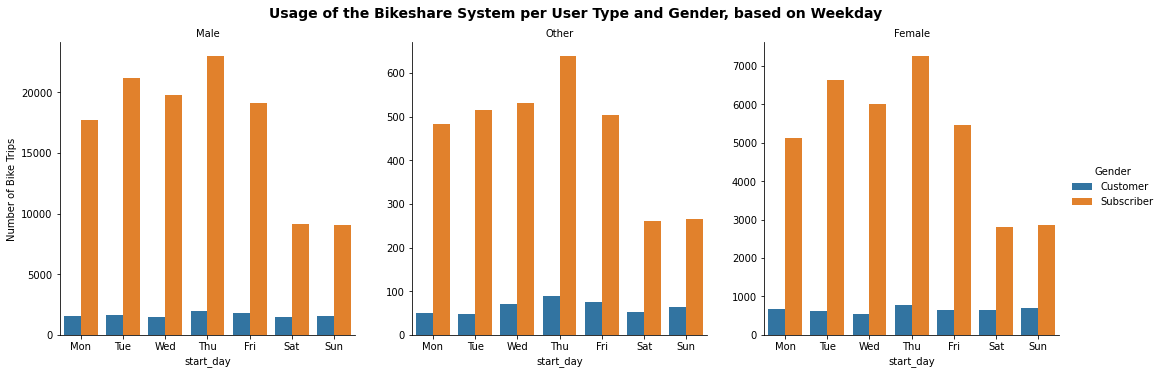

In [58]:
# Relationship between user type, gender and week day

start_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 

plot = sb.catplot(data=df, x='start_day', col="member_gender", hue='user_type', kind='count', sharey = False,
                order = start_day)
plot.set_axis_labels("start_day", "Number of Bike Trips")
plot._legend.set_title('Gender')
plot.set_titles("{col_name}")
plot.fig.suptitle('Usage of the Bikeshare System per User Type and Gender, based on Weekday', y=1.03, fontsize=14, fontweight='semibold');

>#### Observation:
> It is seen that there is less female and other gender usage than male, the trend between customers and subscribers of each gender is similar. Customers of all genders use the service more often during the week days than weekends, while subscribers use the system during the week, predominately.

#### Question 19: What is the relationship between trip duration, user type, member gender and weekday?

<Figure size 432x288 with 0 Axes>

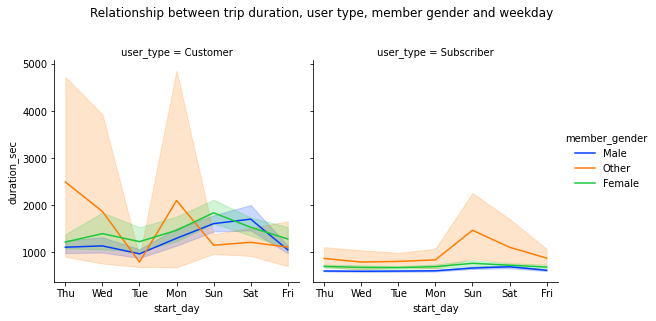

In [59]:
# Relationship between trip duration, user type, gender and days of the week
plt.suptitle('Relationship between trip duration, user type, member gender and weekday')
sb.relplot(x="start_day", y="duration_sec", data=df,palette='bright', height=4, kind='line', col='user_type', hue='member_gender');
plt.suptitle('Relationship between trip duration, user type, member gender and weekday',y=1.1)
plt.show()


>#### Observation:
> There is sharp increase in bike duration during week ends(saturday and sunday) for subscribers.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>It was observed that most users will likley do shorter duration trips below ***10000 seconds***.
>Furthermore, younger users of ages 20 to 40 years are more likely to do long duration of bike trips. 
>It is also interesting to share the almost constant duration of trips for subscribers for mondays to fridays and a sharp increase in trip duration on week ends(saturdays and sundays)
>
> There is less female and other gender usage than male, the trend between customers and subscribers of each gender is similar. Customers of all genders use the service more often during the week days than weekends, while subscribers use the system during the week, predominately.




### Were there any interesting or surprising interactions between features?

> The peak trip duration for the subscribers occur during the weekends.

## Conclusions
>In conclusion, the insights generated from this data can be used for making business decisions by helping the bike riding business to answer questions such as:
>1. What type of bikes should we add to our bike collections? - This can be answered by checking the bikes which are the most popular in bike ID distribution plot.
>2. What time of the day should we have more staff and bikes available? - This can be answered by looking at the visualization of the hours that bike users will most likely start a bike ride.
>3. Decision making concerning making targeted adverts can also be taken and directed to people based on age, gender or user types.
